<a href="https://colab.research.google.com/github/ZainabAbuTaha/Prediction-of-Product-Sales/blob/main/project1_part4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales
- Author: Zainab Abu Taha

# Load and Inspect Data


In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
df=pd.read_csv('/content/drive/MyDrive/AXSOSACADEMY/AXSOSACADEMY/01-Fundamentals/Week02/Data/sales_predictions_2023.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Clean Data

How many rows and columns?

In [3]:
df.shape

(8523, 12)

- There are 8523 rows, and 12 columns

What are the datatypes of each variable?

In [4]:
df.dtypes

,0
Item_Identifier,object
Item_Weight,float64
Item_Fat_Content,object
Item_Visibility,float64
Item_Type,object
Item_MRP,float64
Outlet_Identifier,object
Outlet_Establishment_Year,int64
Outlet_Size,object
Outlet_Location_Type,object


-

Object type for->Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type

Numeric type for-> Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales

Are there duplicates? If so, drop any duplicates.

In [5]:
df.duplicated().sum()

np.int64(0)

- There are no duplicate rows in your dataset

 Identify missing values

In [6]:
df.isna().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


- Item_Weight → 1463 missing values

- Outlet_Size → 2410 missing values

- All other columns → 0 missing values

Address the missing values by using a placeholder value.

In [7]:
df['Outlet_Size']=df['Outlet_Size'].fillna('MISSING')
df['Item_Weight']=df['Item_Weight'].fillna(-1)

- We handle Missing value

Confirm that there are no missing values after addressing them.

In [8]:
df.isna().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


- There is no missing value

Find and fix any inconsistent categories of data (for example: fix cat, Cat, and cats so that they are consistent).



In [9]:
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace({
    "low fat": "Low Fat",
    "LF": "Low Fat",
    "reg": "Regular"
})
df['Item_Fat_Content']

,Item_Fat_Content
0,Low Fat
1,Regular
2,Low Fat
3,Regular
4,Low Fat
...,...
8518,Low Fat
8519,Regular
8520,Low Fat
8521,Regular


- We handle inconsistent in Item_Fat_Content, there is no other value need to hadle in dataset

For any numerical columns, obtain the summary statistics of each (min, max, mean).

In [10]:
numeric_cols = df.select_dtypes(include='number')
summary = numeric_cols.agg(['min', 'max', 'mean'])
summary

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
min,-1.000000,0.000000,31.290000,1985.000000,33.290000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800
mean,10.478936,0.066132,140.992782,1997.831867,2181.288914


# Exploratory Data Analysis

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [12]:
hist_col=df.select_dtypes('number').columns.tolist()

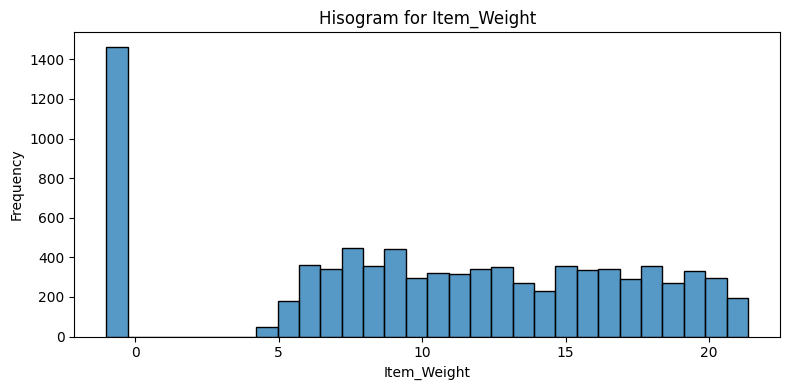

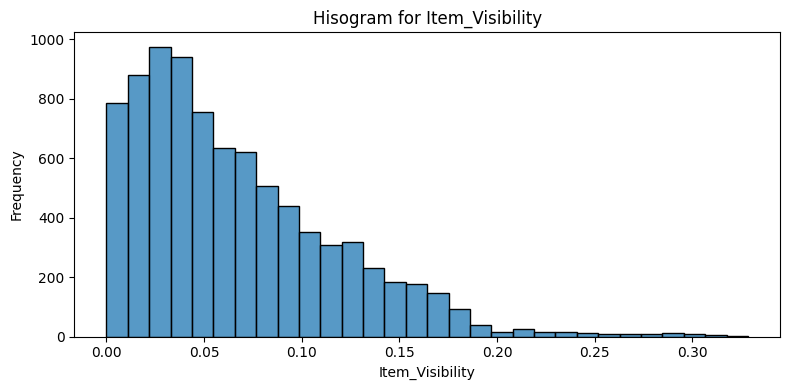

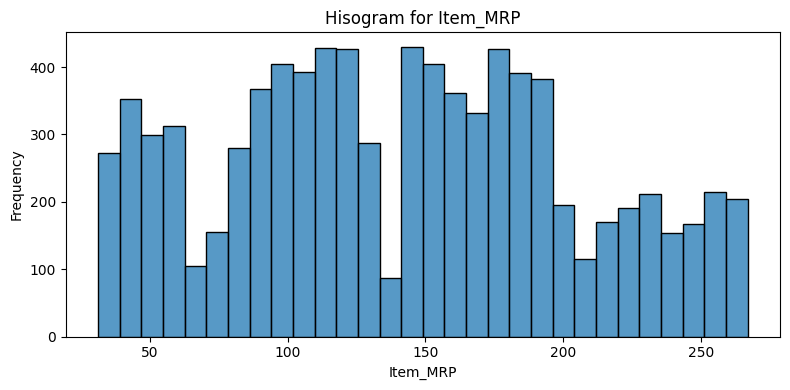

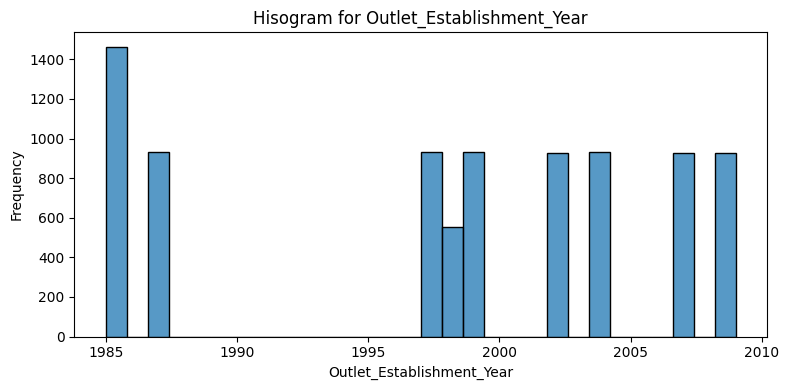

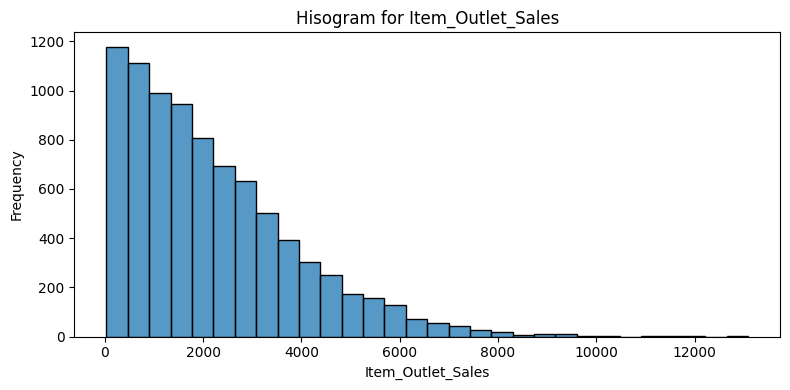

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
for my_hist in hist_col:
  plt.figure(figsize=(8,4))
  sns.histplot(data=df,x=my_hist,bins=30);
  plt.title(f"Hisogram for {my_hist}");
  plt.ylabel("Frequency")
  plt.tight_layout()
  plt.show()

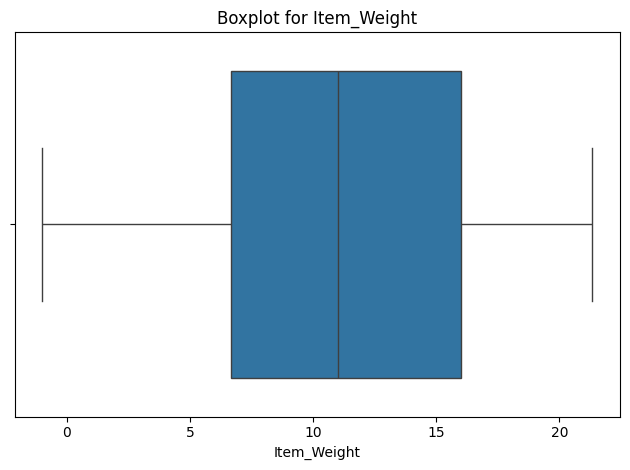

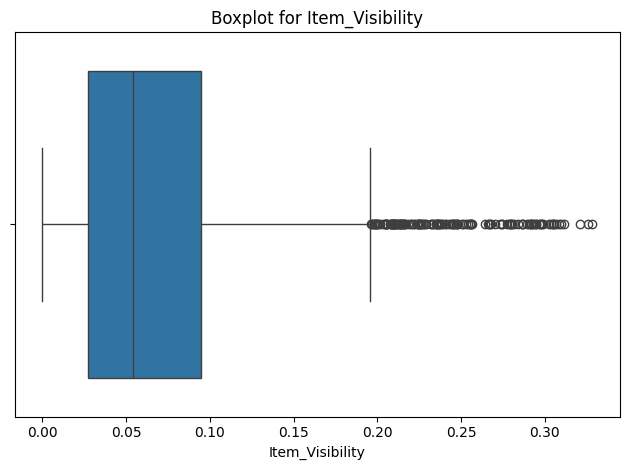

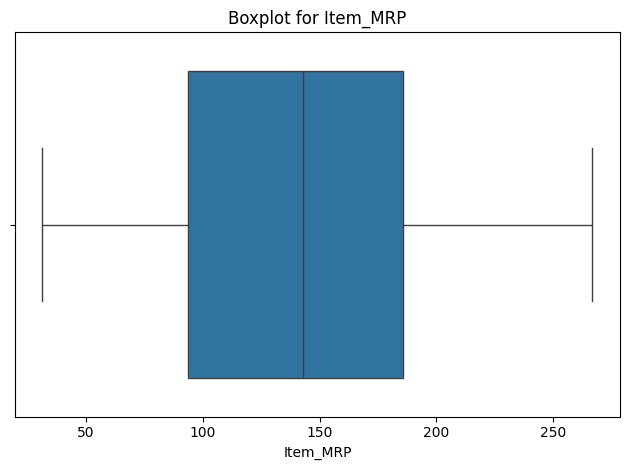

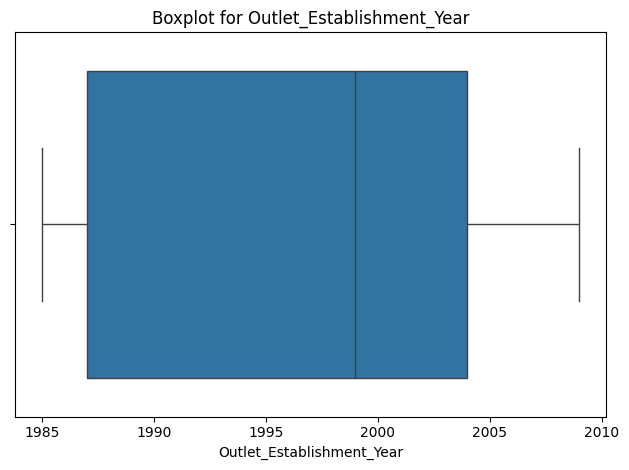

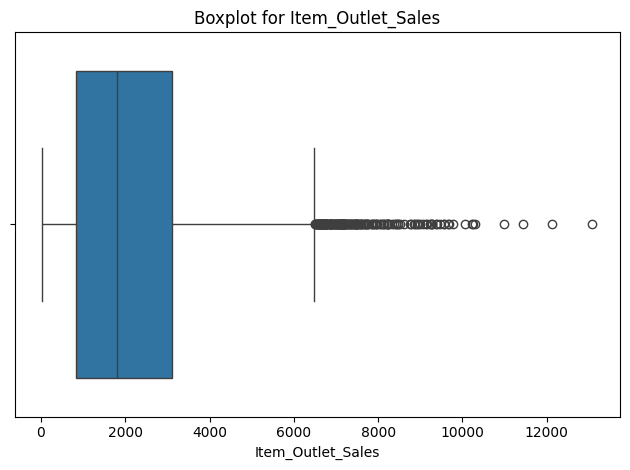

In [15]:
my_boxplot=df.select_dtypes('number').columns.tolist()
for box_col in my_boxplot:
  sns.boxplot(data=df,x=box_col);
  plt.title(f"Boxplot for {box_col}");
  plt.tight_layout()
  plt.show()

In [16]:
df.select_dtypes('object').columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

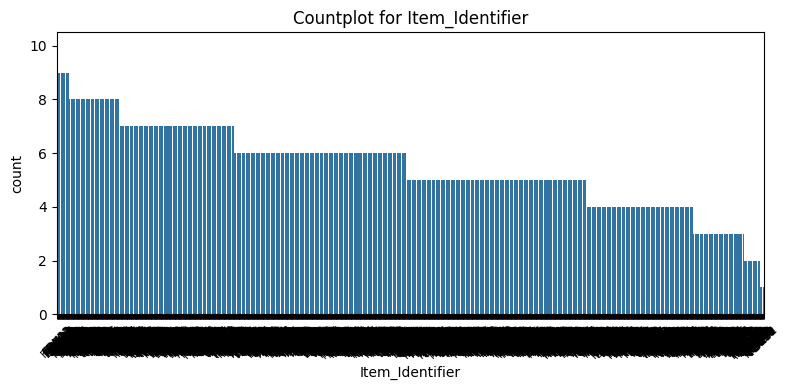

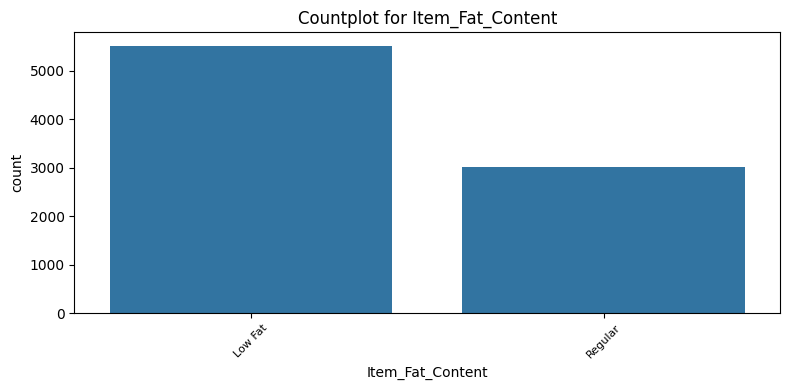

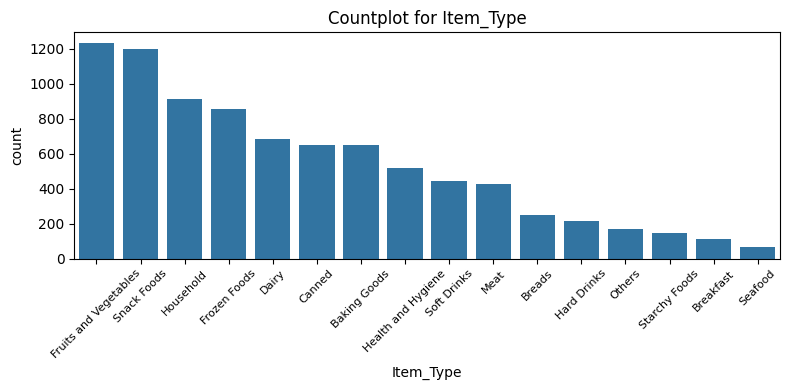

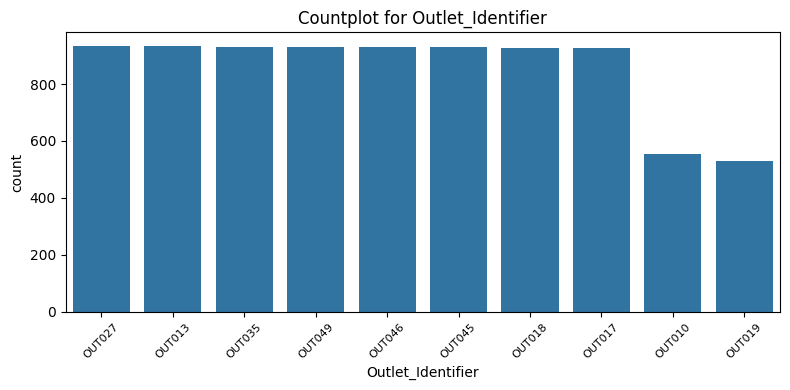

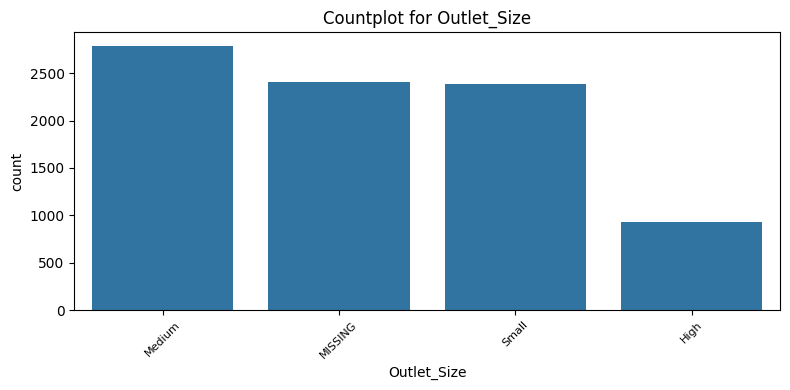

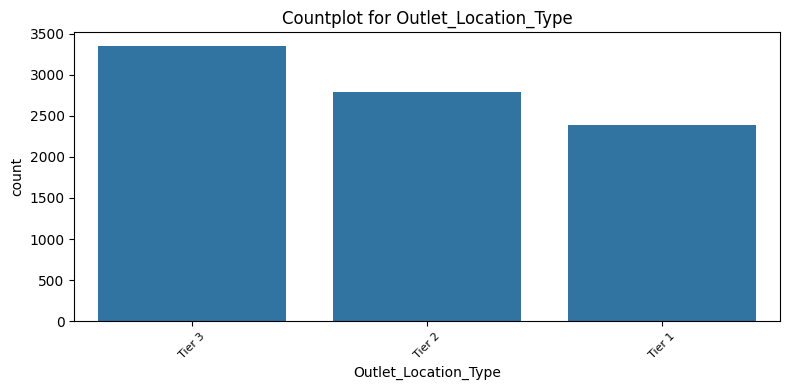

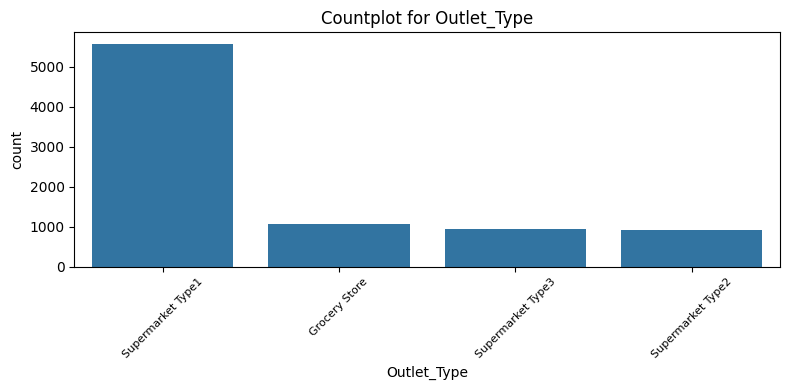

In [17]:
countplot_col=df.select_dtypes('object').columns.tolist()
for countplot_col in countplot_col:
  plt.figure(figsize=(8,4))
  ax=sns.countplot(data=df,x=countplot_col,order=df[countplot_col].value_counts().index);
  ax.set_title(f"Countplot for {countplot_col}");
  plt.xticks(rotation=45, fontsize=8)
  plt.tight_layout()
  plt.show()

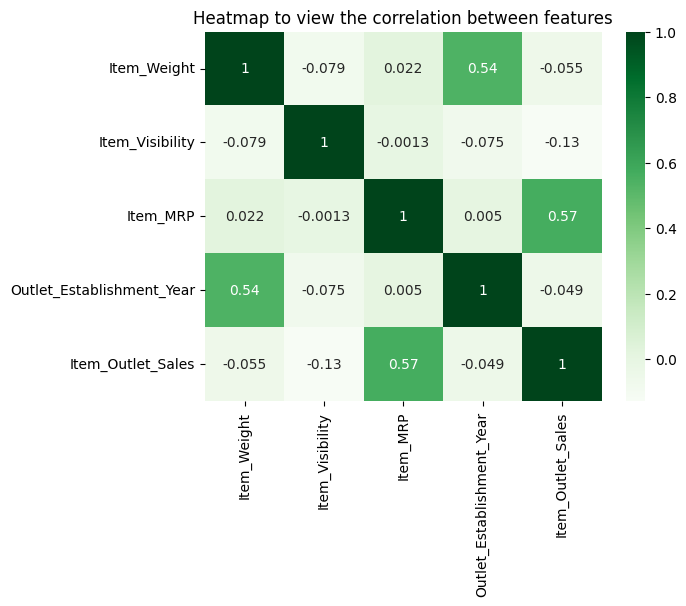

In [18]:
corr=df.corr(numeric_only=True)
corr.round(2)
ax=sns.heatmap(corr,cmap="Greens",annot=True);
ax.set_title('Heatmap to view the correlation between features');

# Feature Inspection

In [19]:
"""UNIVARIATE PLOTTING FUNCTIONS FOR EDA"""
# Add the print statements to the function
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):
  """Creates a seaborn countplot with the option to temporarily fill missing values
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")
  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100
  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax


# TO DO: add the new print statements from explore_categorical
def explore_numeric(df, x, figsize=(6,5) ):
  """Creates a seaborn histplot and boxplot with a share x-axis,
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """

  ## Save null value counts and percent for printing
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100


  ## Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])

  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])

  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')

  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()


  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, axes


In [20]:
"""MULTIVARIATE PLOTTING FUNCTIONS VS. NUMERIC TARGET"""

def plot_categorical_vs_target(df, x, y='rating',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  """Plots a combination of a seaborn barplot of means combined with
  a seaborn stripplot to show the spread of the data.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}", fontweight='bold')
  fig.tight_layout()
  return fig, ax


def plot_numeric_vs_target(df, x, y='rating',
                           figsize=(6,4),
                           ):
  """Plots a seaborn regplot with Pearson's correlation (r) added
  to the title.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]

  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','linewidths':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws)

  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})", fontweight='bold')

  # Make sure the plot is shown before the print statement
  plt.show()

  return fig, ax

In [22]:
import numpy as np
df.replace({'MISSING': np.nan}, inplace=True)

## Item_Identifier
   - Item_Identifier: Product ID

/tmp/ipython-input-1613442045.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


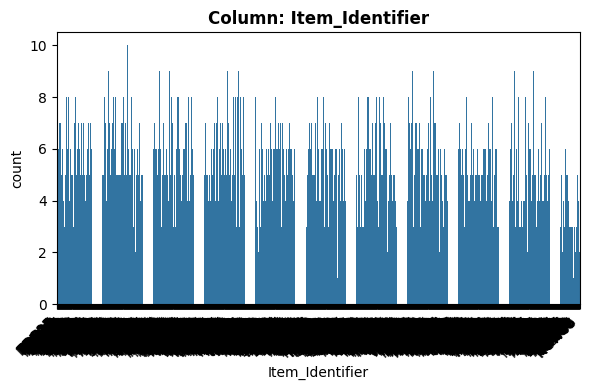

- NaN's Found: 0 (0.0%)
- Unique Values: 1559
- Most common value: 'FDW13' occurs 10 times (0.12%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: Item_Identifier'}, xlabel='Item_Identifier', ylabel='count'>)

In [ ]:
explore_categorical(df, 'Item_Identifier')

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
   - Categorical (nominal)
2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
   - 0 null value(0%)
   - No action needed
3. Is the feature constant or quasi-constant?
   - No
4. What is the cardinality? Is it high (>10)?
   - Very Hight
5. Would we know this feature before the target is determined?
   - Yes
6. Is there a business case/understanding reason to exclude based on our business case?
   - Yes, this is just item id

/tmp/ipython-input-2217617455.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Item_Identifier vs. Item_Outlet_Sales'}, xlabel='Item_Identifier', ylabel='Item_Outlet_Sales'>)

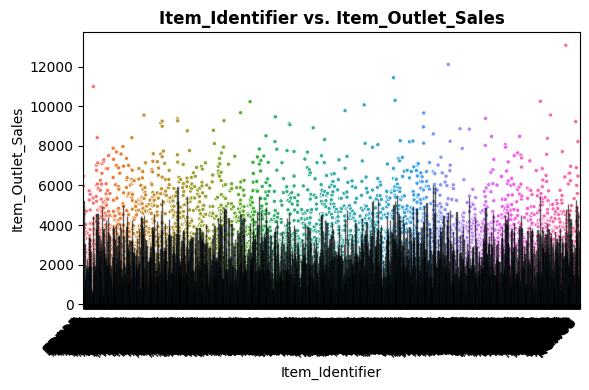

In [ ]:
plot_categorical_vs_target(df, 'Item_Identifier', y='Item_Outlet_Sales')

1. Based on your business understanding, would you expect this feature to be a predictor of the target?
   - No,  this is just item id
2. Does this feature appear to be a predictor of the target?
   - No clear pattern; too many categories to interpret meaningfully

## Item_Weight
 - Item_Weight: Weight of product

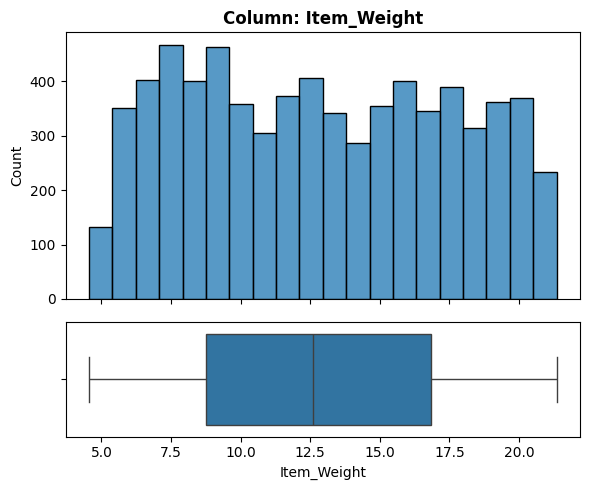

- NaN's Found: 1463 (17.17%)
- Unique Values: 415
- Most common value: 'nan' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [ ]:
explore_numeric(df, 'Item_Weight');

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
   - Numeric
2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
   - 0 null value(0%)
   - No action needed
3. Is the feature constant or quasi-constant?
   - No
4. What is the cardinality? Is it high (>10)?
   - Hight
5. Would we know this feature before the target is determined?
   - Yes
6. Is there a business case/understanding reason to exclude based on our business case?
   - No


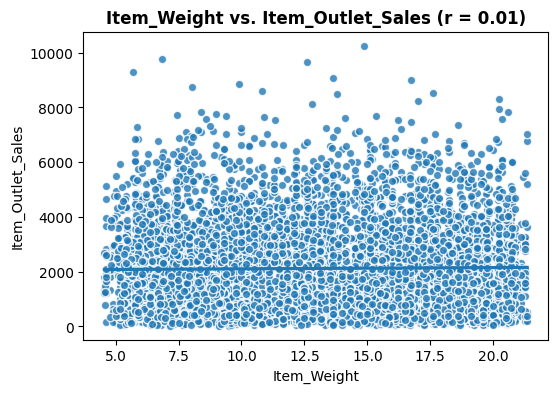

In [ ]:
plot_numeric_vs_target(df, 'Item_Weight', y='Item_Outlet_Sales');

1. Based on your business understanding, would you expect this feature to be a predictor of the target?
   - Possibly
2. Does this feature appear to be a predictor of the target?
   - Weak correlation visually


# Item_Fat_Content
 - Item_Fat_Content: Whether the product is low-fat or regular

/tmp/ipython-input-1613442045.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


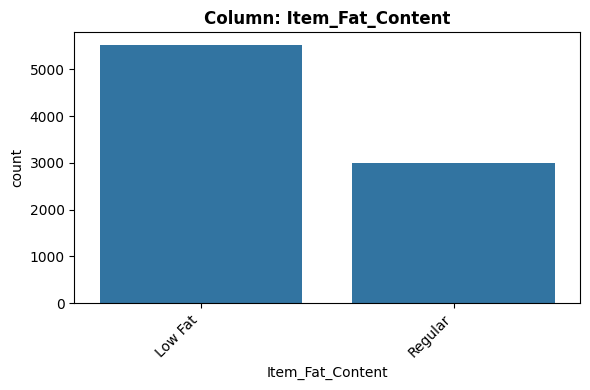

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Low Fat' occurs 5517 times (64.73%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: Item_Fat_Content'}, xlabel='Item_Fat_Content', ylabel='count'>)

In [ ]:
explore_categorical(df, 'Item_Fat_Content')

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
   - Categorical (nominal)  
2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
   - 0 null value
3. Is the feature constant or quasi-constant?
   - No
4. What is the cardinality? Is it high (>10)?
    - low
5. Would we know this feature before the target is determined?
   - Yes
6. Is there a business case/understanding reason to exclude based on our business case?
   - No

/tmp/ipython-input-2217617455.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Item_Fat_Content vs. Item_Outlet_Sales'}, xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>)

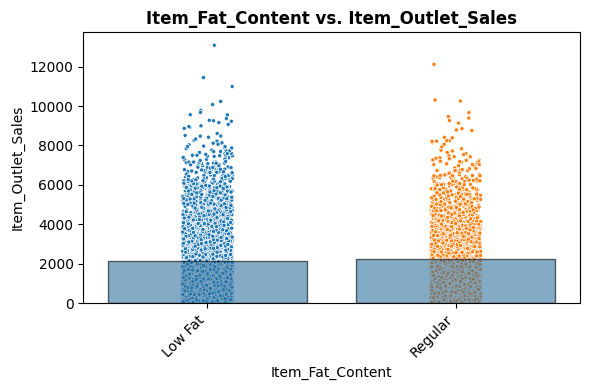

In [ ]:
plot_categorical_vs_target(df, 'Item_Fat_Content', y='Item_Outlet_Sales')

1. Based on your business understanding, would you expect this feature to be a predictor of the target?
   - Yes
2. Does this feature appear to be a predictor of the target?
   - Slight variation in average sales across categories

# Item_Visibility
 - Item_Visibility: The percentage of total display area of all products in a store allocated to the particular product

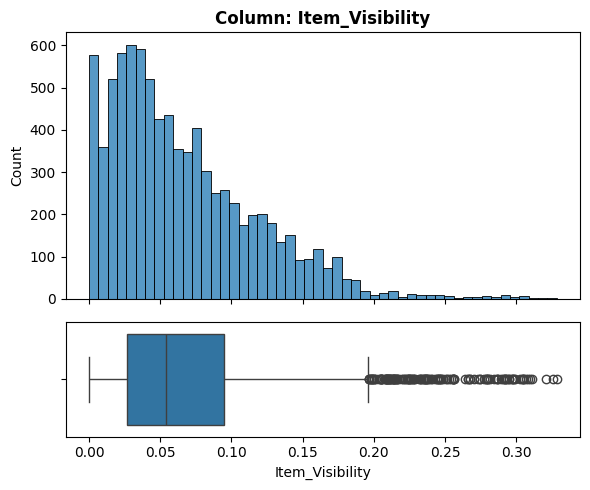

- NaN's Found: 0 (0.0%)
- Unique Values: 7880
- Most common value: '0.0' occurs 526 times (6.17%)
- Not constant or quasi-constant.


(<Figure size 600x500 with 2 Axes>,
 array([<Axes: title={'center': 'Column: Item_Visibility'}, xlabel='Item_Visibility', ylabel='Count'>,
        <Axes: xlabel='Item_Visibility'>], dtype=object))

In [ ]:
explore_numeric(df, 'Item_Visibility')

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
   - Numeric   
2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
   - 0 null value
3. Is the feature constant or quasi-constant?
   - No
4. What is the cardinality? Is it high (>10)?
    - High
5. Would we know this feature before the target is determined?
   - Yes
6. Is there a business case/understanding reason to exclude based on our business case?
   - No, visibility affects product exposure and potential sales

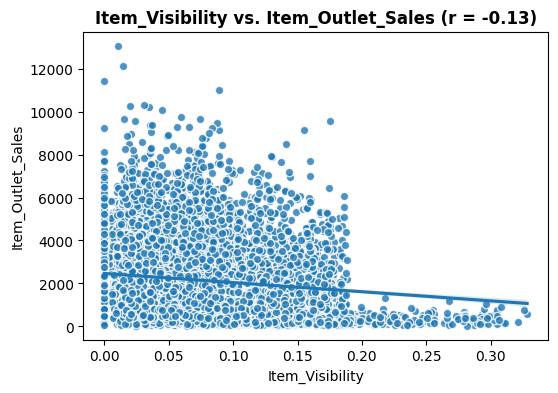

(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Item_Visibility vs. Item_Outlet_Sales (r = -0.13)'}, xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>)

In [ ]:
plot_numeric_vs_target(df, 'Item_Visibility', y='Item_Outlet_Sales')

1. Based on your business understanding, would you expect this feature to be a predictor of the target?
   - Yes – more visibility should lead to more sales  
2. Does this feature appear to be a predictor of the target?
   - Weak or inverse correlation

# Item_Type
 - Item_Type: The category to which the product belongs

/tmp/ipython-input-1613442045.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


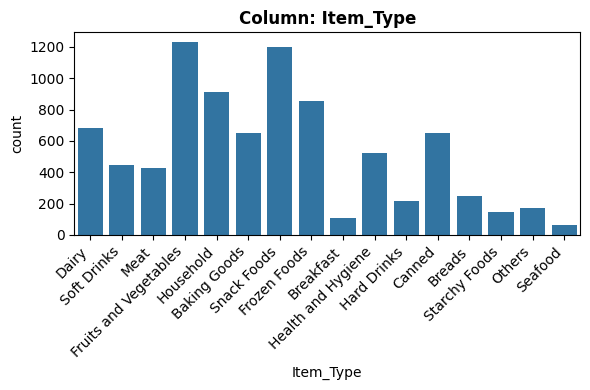

- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Most common value: 'Fruits and Vegetables' occurs 1232 times (14.46%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: Item_Type'}, xlabel='Item_Type', ylabel='count'>)

In [ ]:
explore_categorical(df, 'Item_Type')

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
   - Categorical (nominal)
2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
   - 0 null value(0%)
   - No action needed
3. Is the feature constant or quasi-constant?
   - No
4. What is the cardinality? Is it high (>10)?
   - Hight
5. Would we know this feature before the target is determined?
   - Yes
6. Is there a business case/understanding reason to exclude based on our business case?
   - No, product type directly affects demand

/tmp/ipython-input-2217617455.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Item_Type vs. Item_Outlet_Sales'}, xlabel='Item_Type', ylabel='Item_Outlet_Sales'>)

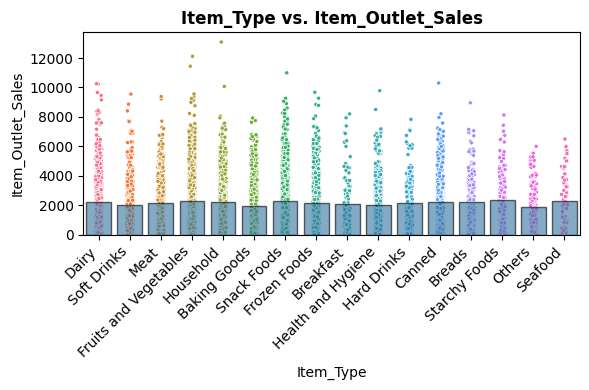

In [ ]:
plot_categorical_vs_target(df, 'Item_Type', y='Item_Outlet_Sales')

1. Based on your business understanding, would you expect this feature to be a predictor of the target?
   - Yes, some product types are more popular   
2. Does this feature appear to be a predictor of the target?
   - No

# Item_MRP
 - Item_MRP: Maximum Retail Price (list price) of the product

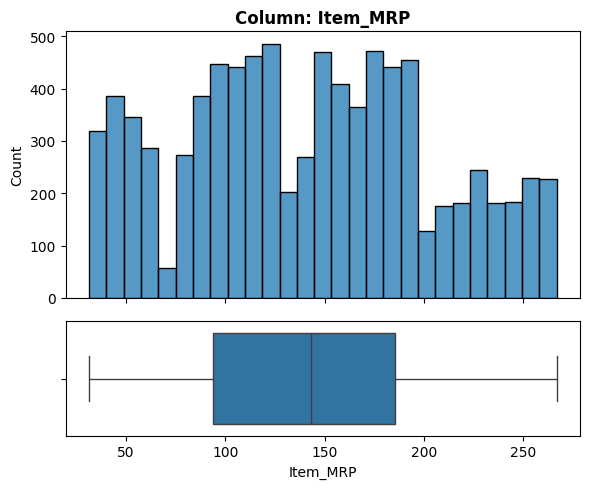

- NaN's Found: 0 (0.0%)
- Unique Values: 5938
- Most common value: '172.0422' occurs 7 times (0.08%)
- Not constant or quasi-constant.


(<Figure size 600x500 with 2 Axes>,
 array([<Axes: title={'center': 'Column: Item_MRP'}, xlabel='Item_MRP', ylabel='Count'>,
        <Axes: xlabel='Item_MRP'>], dtype=object))

In [ ]:
explore_numeric(df, 'Item_MRP')

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
   - Numeric
2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
   - 0 null value(0%)
   - No action needed
3. Is the feature constant or quasi-constant?
   - No
4. What is the cardinality? Is it high (>10)?
   - Hight
5. Would we know this feature before the target is determined?
   - Yes
6. Is there a business case/understanding reason to exclude based on our business case?
   - No, price is a key driver of sales

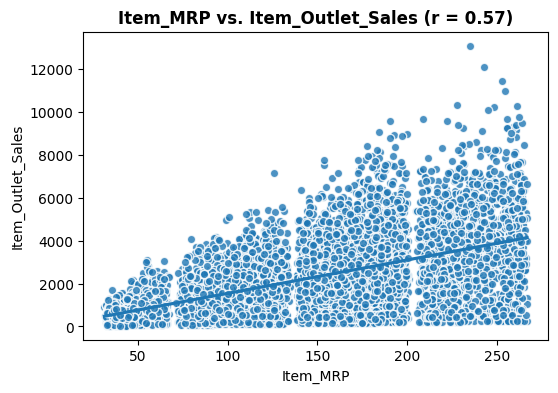

(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Item_MRP vs. Item_Outlet_Sales (r = 0.57)'}, xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>)

In [ ]:
plot_numeric_vs_target(df, 'Item_MRP', y='Item_Outlet_Sales')

1. Based on your business understanding, would you expect this feature to be a predictor of the target?
   - Strongly, price directly influences purchase decisions   
2. Does this feature appear to be a predictor of the target?
   - Yes, Strong positive correlation with sales

# Outlet_Size
 - Outlet_Size: The size of the store in terms of ground area covered

/tmp/ipython-input-1613442045.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


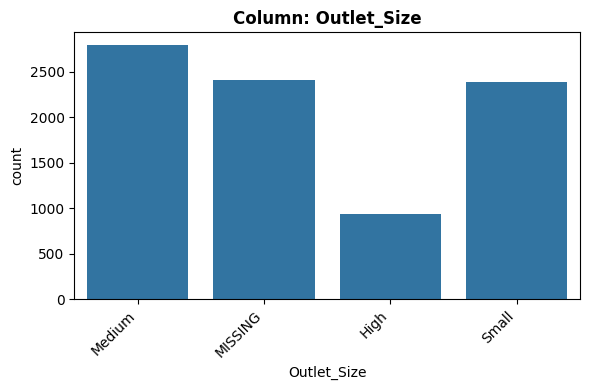

- NaN's Found: 2410 (28.28%)
- Unique Values: 4
- Most common value: 'Medium' occurs 2793 times (32.77%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: Outlet_Size'}, xlabel='Outlet_Size', ylabel='count'>)

In [ ]:
explore_categorical(df, 'Outlet_Size')

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
   - Numeric
2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
   - 2410 (28.28%)
   - No action needed
3. Is the feature constant or quasi-constant?
   - No
4. What is the cardinality? Is it high (>10)?
   - Low
5. Would we know this feature before the target is determined?
   - Yes
6. Is there a business case/understanding reason to exclude based on our business case?
   - No, store size may affect foot traffic and inventory

/tmp/ipython-input-2217617455.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Outlet_Size vs. Item_Outlet_Sales'}, xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>)

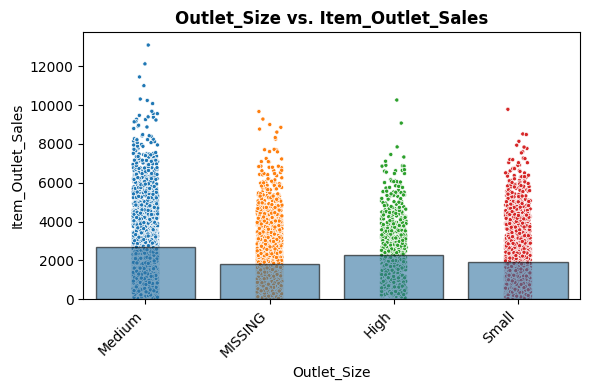

In [ ]:
plot_categorical_vs_target(df, 'Outlet_Size', y='Item_Outlet_Sales')

1. Based on your business understanding, would you expect this feature to be a predictor of the target?
   - Yes, larger stores may attract more customers
2. Does this feature appear to be a predictor of the target?
   - No

# Outlet_Identifier
   - Outlet_Identifier:Store ID

/tmp/ipython-input-1613442045.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


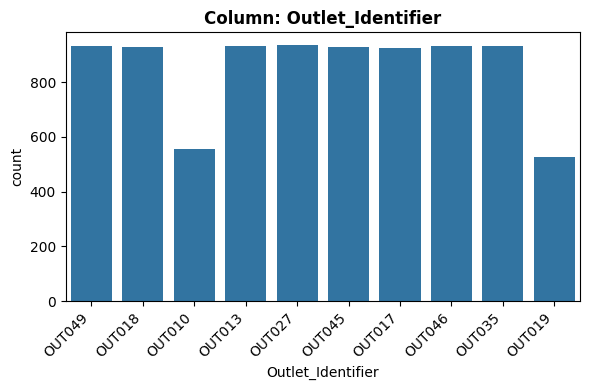

- NaN's Found: 0 (0.0%)
- Unique Values: 10
- Most common value: 'OUT027' occurs 935 times (10.97%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: Outlet_Identifier'}, xlabel='Outlet_Identifier', ylabel='count'>)

In [ ]:
explore_categorical(df, 'Outlet_Identifier')

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
   - Categorical (nominal)
2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
   - 0 null value(0%)
   - No action needed
3. Is the feature constant or quasi-constant?
   - No
4. What is the cardinality? Is it high (>10)?
   - Hight
5. Would we know this feature before the target is determined?
   - Yes
6. Is there a business case/understanding reason to exclude based on our business case?
   - Yes, this is just an identifier, not a meaningful feature. It doesn’t carry predictive value unless used for grouping or encoding.

/tmp/ipython-input-2217617455.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Outlet_Identifier vs. Item_Outlet_Sales'}, xlabel='Outlet_Identifier', ylabel='Item_Outlet_Sales'>)

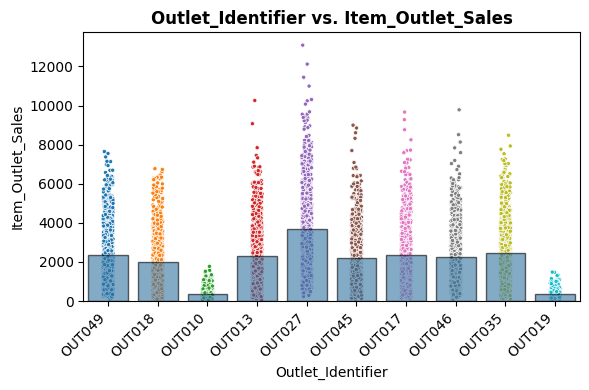

In [ ]:
plot_categorical_vs_target(df, 'Outlet_Identifier', y='Item_Outlet_Sales')

1. Based on your business understanding, would you expect this feature to be a predictor of the target?
   - No, it is just a store ID
2. Does this feature appear to be a predictor of the target?
   - No

# Outlet_Establishment_Year
   - Outlet_Establishment_Year: The year in which store was established

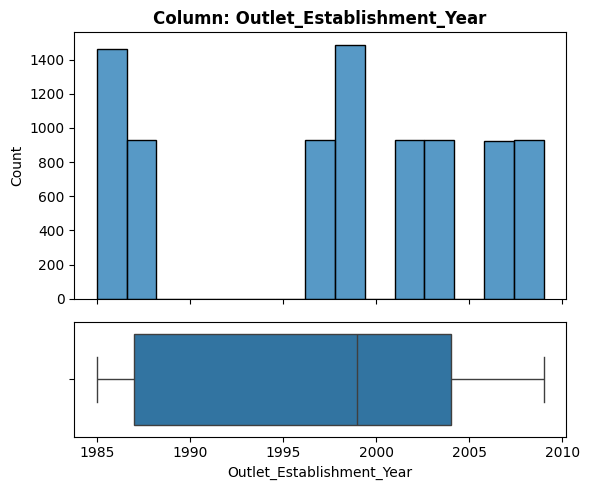

- NaN's Found: 0 (0.0%)
- Unique Values: 9
- Most common value: '1985' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


(<Figure size 600x500 with 2 Axes>,
 array([<Axes: title={'center': 'Column: Outlet_Establishment_Year'}, xlabel='Outlet_Establishment_Year', ylabel='Count'>,
        <Axes: xlabel='Outlet_Establishment_Year'>], dtype=object))

In [ ]:
explore_numeric(df, 'Outlet_Establishment_Year')

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
   - Numeric
2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
   - 0 null value(0%)
   - No action needed
3. Is the feature constant or quasi-constant?
   - No
4. What is the cardinality? Is it high (>10)?
   - Low
5. Would we know this feature before the target is determined?
   - Yes
6. Is there a business case/understanding reason to exclude based on our business case?
   - No, store age may influence customer trust, brand loyalty, and sales volume

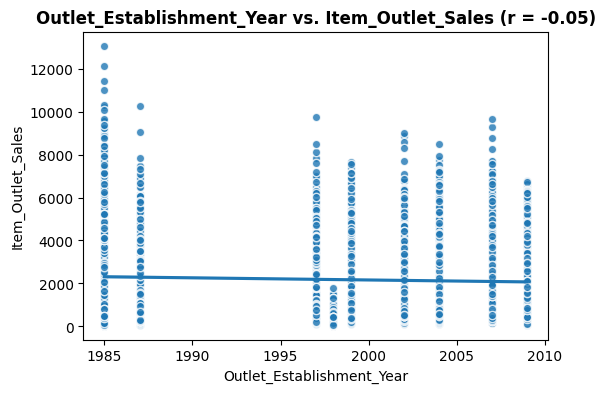

(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Outlet_Establishment_Year vs. Item_Outlet_Sales (r = -0.05)'}, xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>)

In [ ]:
plot_numeric_vs_target(df, 'Outlet_Establishment_Year', y='Item_Outlet_Sales')

1. Based on your business understanding, would you expect this feature to be a predictor of the target?
   - Yes
2. Does this feature appear to be a predictor of the target?
   - No

# Outlet_Location_Type
   - Outlet_Location_Type: The type of area in which the store is located

/tmp/ipython-input-1613442045.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


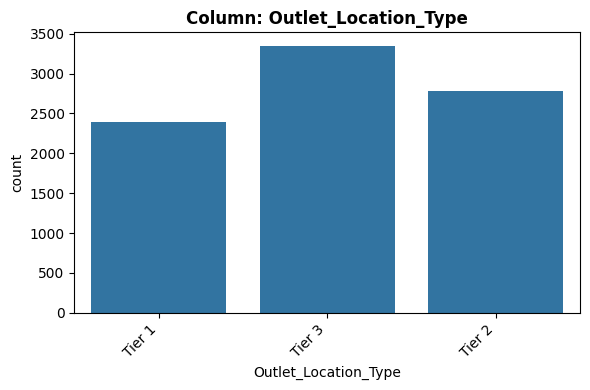

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'Tier 3' occurs 3350 times (39.31%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: Outlet_Location_Type'}, xlabel='Outlet_Location_Type', ylabel='count'>)

In [ ]:
explore_categorical(df, 'Outlet_Location_Type')

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
   - Categorical (ordinal)
2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
   - 0 null value(0%)
   - No action needed
3. Is the feature constant or quasi-constant?
   - No
4. What is the cardinality? Is it high (>10)?
   - Low
5. Would we know this feature before the target is determined?
   - Yes
6. Is there a business case/understanding reason to exclude based on our business case?
   - No, location affects demand

/tmp/ipython-input-2217617455.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Outlet_Location_Type vs. Item_Outlet_Sales'}, xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>)

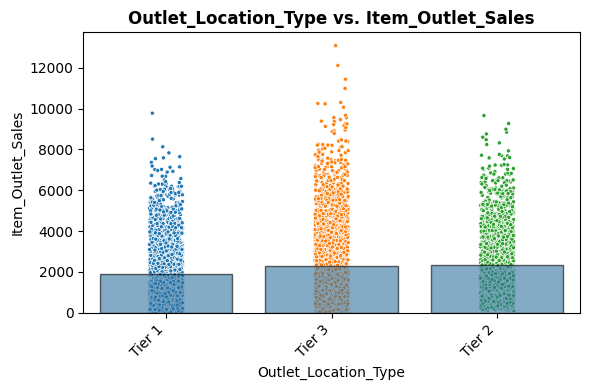

In [ ]:
plot_categorical_vs_target(df, 'Outlet_Location_Type', y='Item_Outlet_Sales')

1. Based on your business understanding, would you expect this feature to be a predictor of the target?
   - Yes   
2. Does this feature appear to be a predictor of the target?
   - It affects little, Tier 3 locations show higher average sales

# Outlet_Type
   - Outlet_Type: Whether the outlet is a grocery store or some sort of supermarket

/tmp/ipython-input-1613442045.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


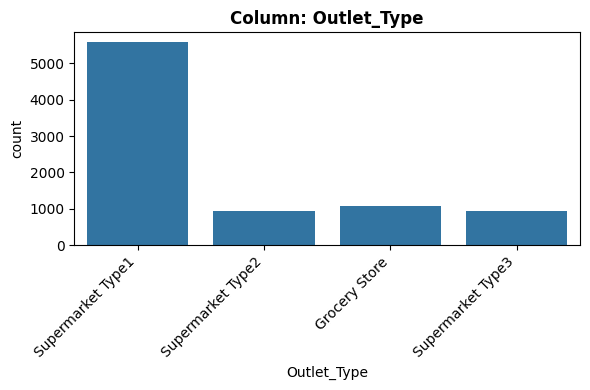

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'Supermarket Type1' occurs 5577 times (65.43%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: Outlet_Type'}, xlabel='Outlet_Type', ylabel='count'>)

In [ ]:
explore_categorical(df, 'Outlet_Type')

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
   - Categorical (nominal)
2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
   - 0 null value(0%)
   - No action needed
3. Is the feature constant or quasi-constant?
   - No
4. What is the cardinality? Is it high (>10)?
   - Low
5. Would we know this feature before the target is determined?
   - Yes
6. Is there a business case/understanding reason to exclude based on our business case?
   - No, outlet type affects product mix and pricing

/tmp/ipython-input-2217617455.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Outlet_Type vs. Item_Outlet_Sales'}, xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>)

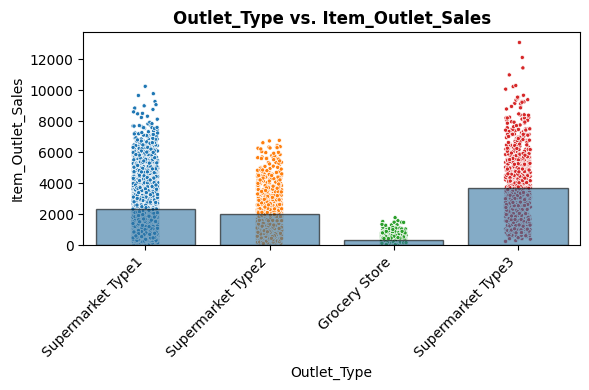

In [ ]:
plot_categorical_vs_target(df, 'Outlet_Type', y='Item_Outlet_Sales')

1. Based on your business understanding, would you expect this feature to be a predictor of the target?
   - Yes
2. Does this feature appear to be a predictor of the target?
   - Yes, Supermarket Type3 show significantly higher sales